# BoomBikes Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**So interpretation is important!**

## Step 1: Reading the Data

Let us first import NumPy and Pandas and read the boombikes dataset

In [1626]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1627]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [1628]:
boombikes = pd.read_csv("day.csv")

In [1629]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the boombikes dataframe

In [1630]:
boombikes.shape

(730, 16)

In [1631]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1632]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Understanding the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### 2.1 Cleaning Data:
As mentioned in the case study, some data require handling in different ways.

The following fields are potentially causing multicollinearity, so avoid confusing the model, we'll drop them:
- Since the sum of `registered` and `casual` is stored in `cnt`, so to avoid multicollinearity, it'll drop both columns
- The field `atemp` and `temp` will confuse the model. In reality, people would make decisions based on the real feel of the weather, so `temp` is to be dropped.

Other unnecessary fields are dropped for the reasons mentioned below:
- The field `instant` is irrilevant to the data analysis, it's just a numeric counter for instances.
- The field `dteday` is already represented in `mnth` and `yr` more efficiently, so to avoid confusion, it'll be dropped.
- The field `workingday` can be dropped as it's represented as `0` if `weekday` is `0` or `6`.


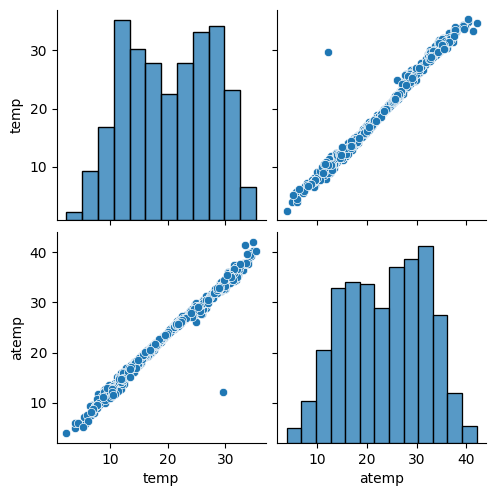

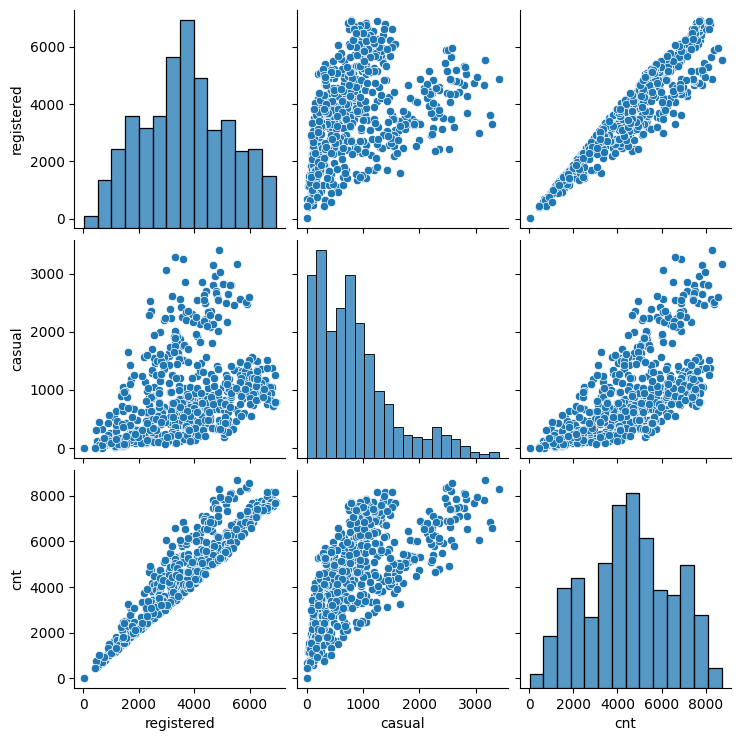

In [1633]:
# Validating the above assumptions by plotting some graphs
sns.pairplot(data=boombikes, vars=['temp','atemp'])
plt.show()
sns.pairplot(data=boombikes, vars=['registered','casual','cnt'])
plt.show()


In [1634]:
boombikes = boombikes.drop(columns=['registered','casual','instant','dteday', 'temp'], axis=1)

In [1635]:
# Read the data again
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [1636]:
boombikes.shape

(730, 11)

#### 2.2 Enhance Readability
For the rest of the columns, we'll rename some fields to enhance the readability (e.g.: mnth to month, yr to year, and so on)

In [1637]:
boombikes = boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [1638]:
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


Next, we'll map some the categorial variables to their corresponding string values

In [1639]:
varSeason = ['season']
# Defining the map function
def binary_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

boombikes[varSeason] = boombikes[varSeason].apply(binary_map)

In [1640]:
varMonth = ['month']
def binary_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

boombikes[varMonth] = boombikes[varMonth].apply(binary_map)

In [1641]:
varWeekday = ['weekday']
# Defining the map function
def binary_map(x):
    return x.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

boombikes[varWeekday] = boombikes[varWeekday].apply(binary_map)

In [1642]:
varWeathersit = ['weathersit']
# Defining the map function
def binary_map(x):
    return x.map({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})

boombikes[varWeathersit] = boombikes[varWeathersit].apply(binary_map)

## Step 3: Visualising Data

Now, we'll start visualizing data using plots and heatmaps to understand the correlation between variables

In [1643]:
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


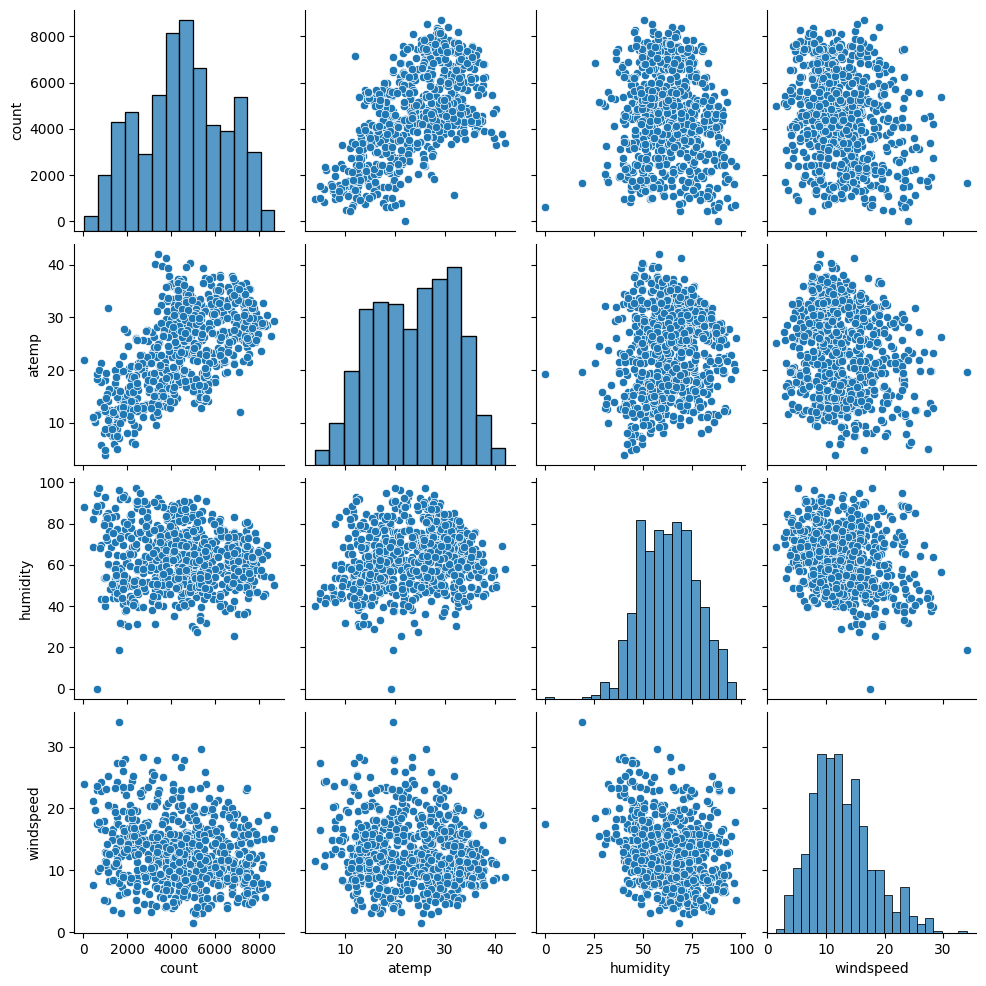

In [1644]:
# Start with pairplotting the numeric values

sns.pairplot(data=boombikes, vars=['count','atemp','humidity','windspeed'])
plt.show()

**Observation:** The total `count` of users is highly impacted by the realfeel of `atemp`.

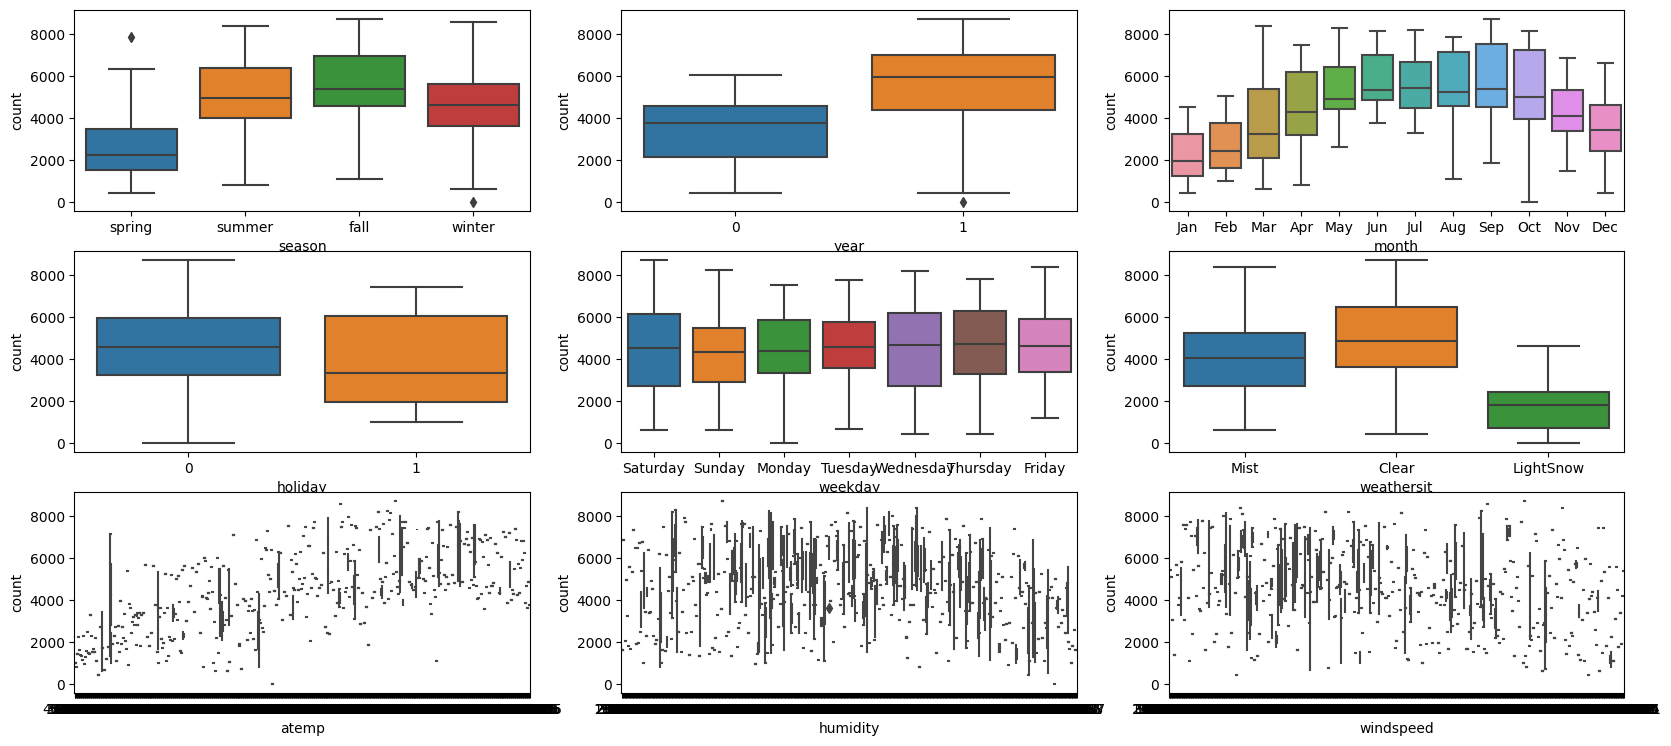

In [1645]:
# Next, boxplotting categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes)
plt.subplot(4,3,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes)
plt.subplot(4,3,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes)
plt.subplot(4,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes)
plt.subplot(4,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes)
plt.subplot(4,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = boombikes)
plt.subplot(4,3,7)
sns.boxplot(x = 'atemp', y = 'count', data = boombikes)
plt.subplot(4,3,8)
sns.boxplot(x = 'humidity', y = 'count', data = boombikes)
plt.subplot(4,3,9)
sns.boxplot(x = 'windspeed', y = 'count', data = boombikes)
plt.show()

**Observations:**
- There's a huge increase in rentals in `2019`.
- The `fall` season of `2019` is the highest, followed by the `summer`.
- The `spring` season in both years shows very low rent rates.
- Rentals across the week is consistent, people are renting bikes during `holiday` and `weekdays`.
- There's no single day representing `HeavyRain` in the dataset.
- The fields `atemp`, `humidity`, and `windspeed` need further handling (scaling) to be readable, which will be done after splitting data into train and test sets.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `year` and `count` with `season` as the hue.

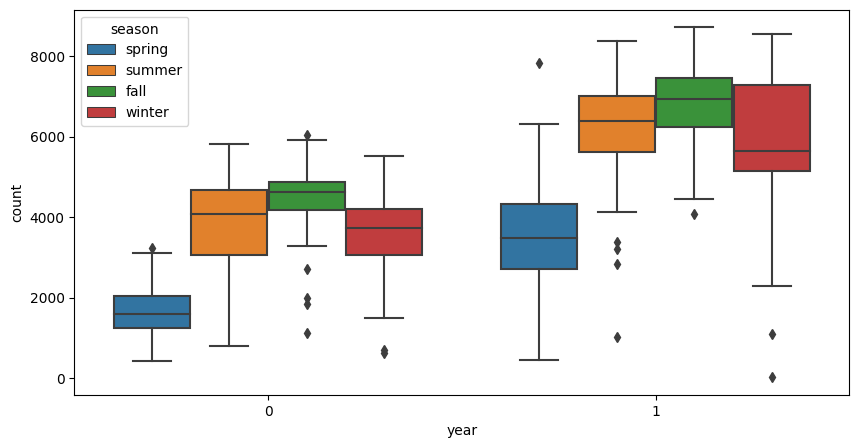

In [1646]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'count', hue = 'season', data = boombikes)
plt.show()

**Observations:** 
- The rents across all seasons are much higher in `2019`.
- Still the `spring` season is the lowest by far, but the `winter` season is showing higher interest in `2019` compared to `2018`.

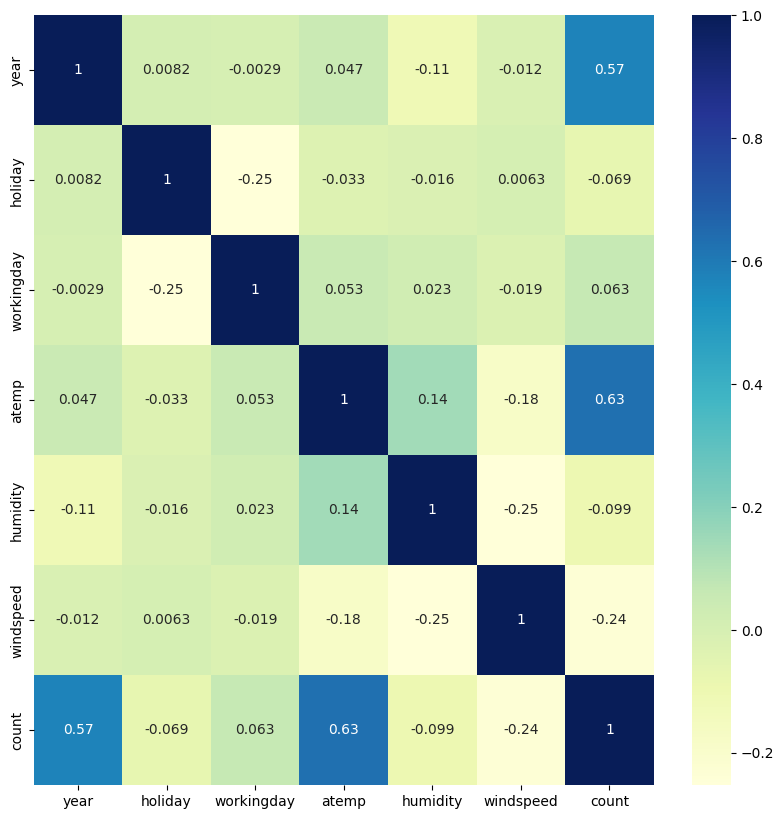

In [1647]:
# Checking for correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Across all numerical variables, `atemp` has the highest correlation with `count`, followed by `year`.
- This is not enough at all to build the model, since the categorical variables are not yet converted into dummy numerical variables to understand their imapct.

## Step 4: Data Preparation

### Dummy Variables

The categorical variables `month`, `season`, `weekday` and `weathersit` need to have dummy variables out of them to realisticly visualize their components, and understand their impact.

In [1648]:
# Get the dummy variables for the features/categorical variables below
# We'll handle 'season' separately
dummy = boombikes[['month','weekday','season','weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True)

In [1649]:
# Adding the new dummy variables to the BoomBikes data set
boombikes = pd.concat([dummy, boombikes], axis=1)

Regarding getting dummy variables for the feature `season`, since we know from the previous visuals that `fall` has the highest rental rate, it's not preferred to use `drop_first` to avoid dropping `fall`, so we'll purposefully drop `spring` as being of a least impact.

In [1650]:
# Check what the new dataset looks like
boombikes.shape

(730, 33)

In [1651]:
boombikes.columns

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_LightSnow', 'weathersit_Mist', 'season', 'year', 'month',
       'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

The `drop_first` is helpful to apply the rule `(n-1)` for the needed number of dummy variables:

- `fall` is dropped as being `0` in all other `seasons` columns
- `Apr` is dropped as being `0` in all other `months` columns
- `Friday` is dropped as being `0` in all other `weekdays` columns
- `HeavyRain` has no existence in the data set, so it was dropped automatically.
- `Clear` is dropped as being `0` in all other `weathersits` columns

In [1652]:
# Now let's see the head of our dataframe.

boombikes.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [1653]:
# Drop the columns which dummy variables were created against
# Dropping 'month', 'season','weekday','weathersit'
boombikes = boombikes.drop(['month', 'season','weekday','weathersit'], axis=1)

In [1654]:
# Check what the new dataset looks like
boombikes.shape

(730, 29)

In [1655]:
boombikes.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season_winter,weathersit_LightSnow,weathersit_Mist,year,holiday,workingday,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,11.46350,43.6957,12.522300,1600


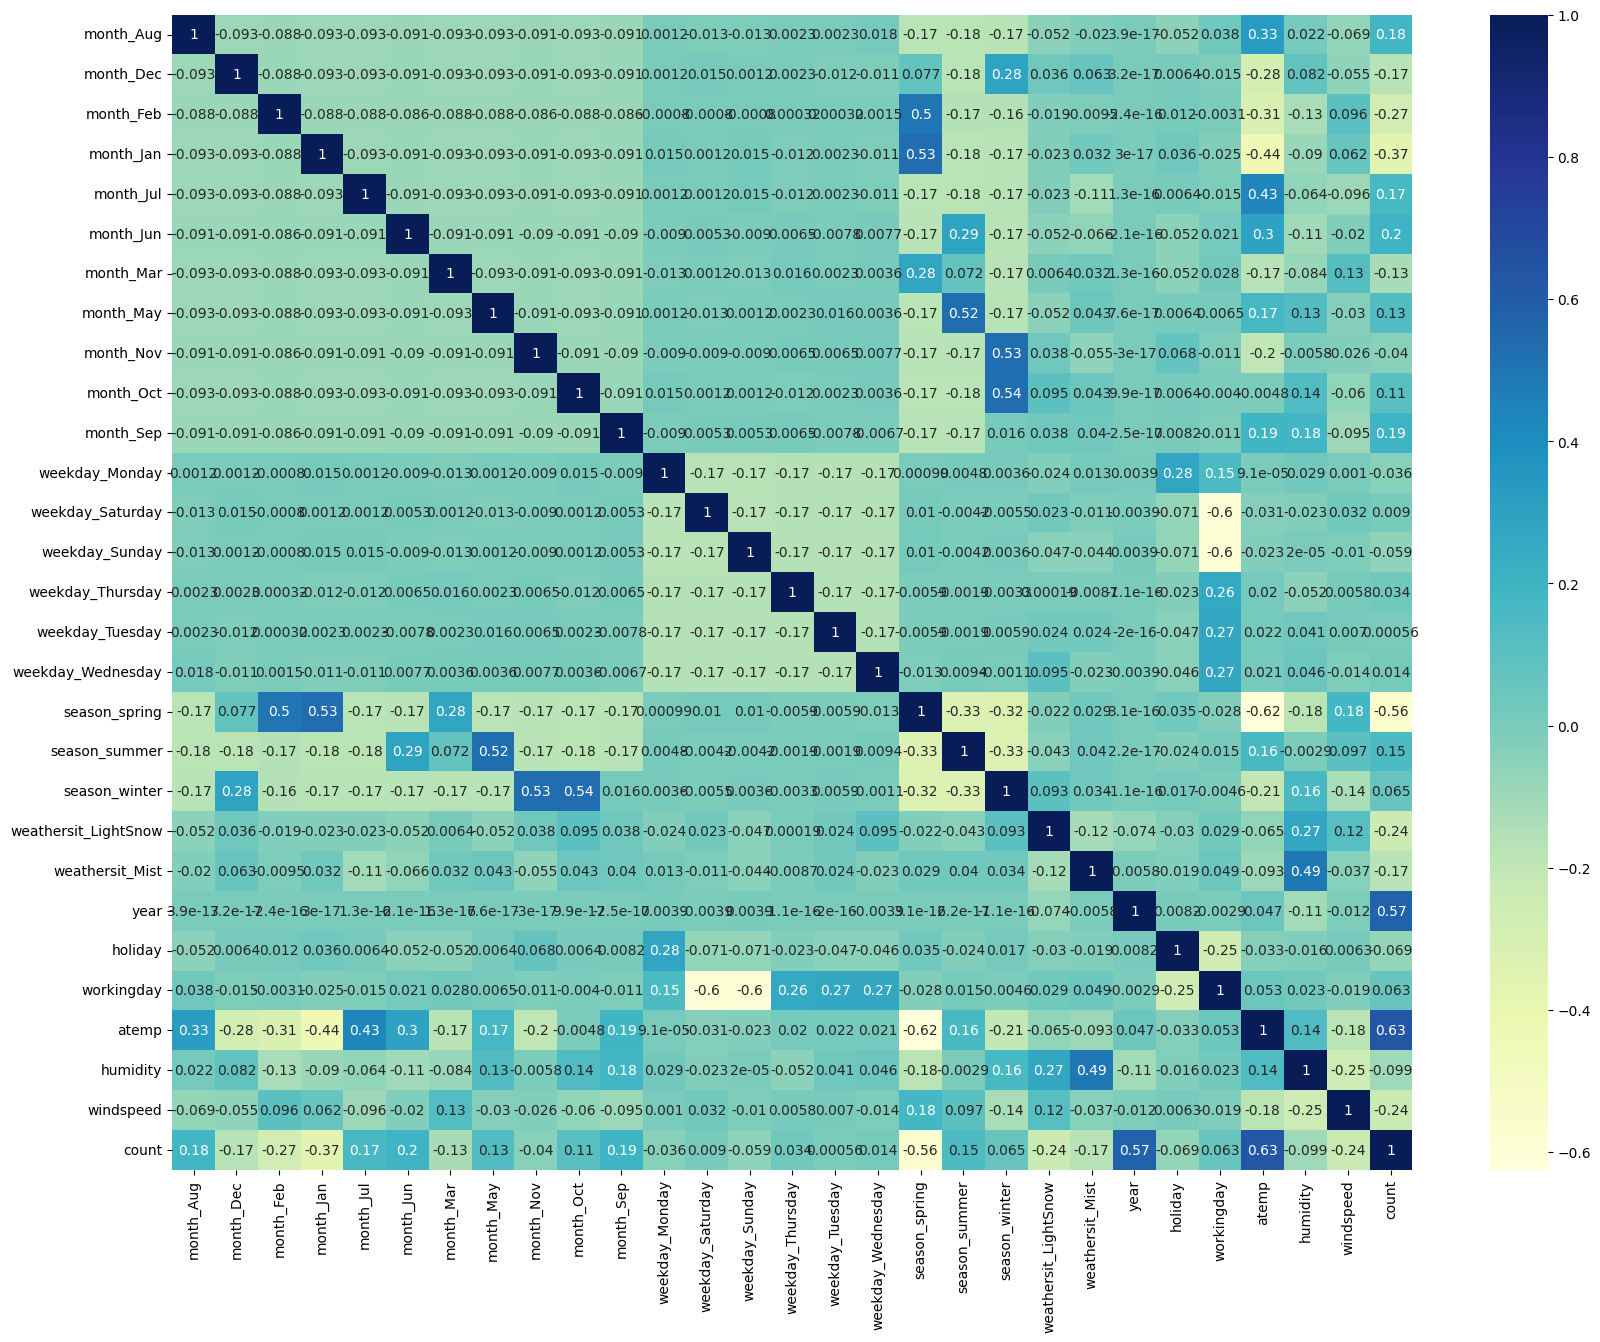

In [1656]:
# Re-draw the heatmap with the new derived variables
plt.figure(figsize=(20,15))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Still `atemp` is the highest correlated variable with `count`.
- The field `year` comes in next in correlation.
- Months of `Jun`, `Jul`, `Aug` and `Sep` are of the highest correlation across `months`.
- The season `fall` has the highest correlation with `count`, followed by `summer`.


## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [1657]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling Features

We'll be using MinMax scaling.

In [1658]:
scaler = MinMaxScaler()

In [1659]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['count','atemp','humidity','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1660]:
df_train.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season_winter,weathersit_LightSnow,weathersit_Mist,year,holiday,workingday,atemp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.391735,0.504508,0.188475,0.482973


In [1661]:
df_train.describe()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season_winter,weathersit_LightSnow,weathersit_Mist,year,holiday,workingday,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.24902,0.029412,0.343137,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.43287,0.169124,0.475223,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


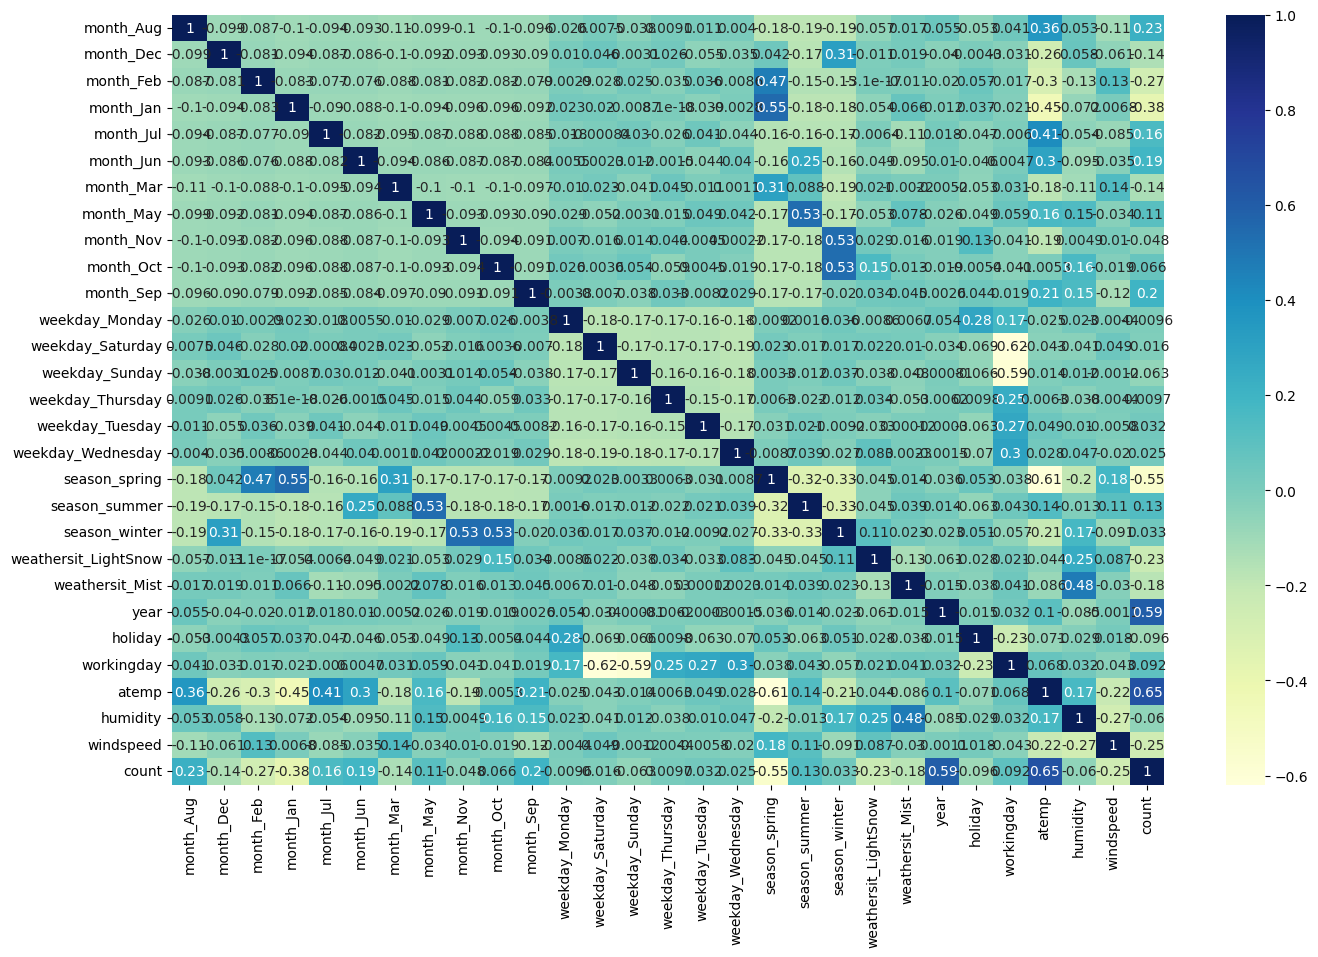

In [1662]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1663]:
y_train = df_train.pop('count')
X_train = df_train

In [1664]:
X_train.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist,year,holiday,workingday,atemp,humidity,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0.501133,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0.391735,0.504508,0.188475


## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [1665]:
# Running RFE with all the output of 10 variables
lm = LinearRegression()
lm.fit(X_train,y_train)
   
# Running RFE
rfe = RFE(lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [1666]:
# List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('month_Aug', False, 2),
 ('month_Dec', False, 6),
 ('month_Feb', False, 7),
 ('month_Jan', False, 4),
 ('month_Jul', False, 16),
 ('month_Jun', False, 10),
 ('month_Mar', False, 17),
 ('month_May', False, 9),
 ('month_Nov', False, 5),
 ('month_Oct', False, 13),
 ('month_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 15),
 ('season_spring', False, 8),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', False, 3),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [1667]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['month_Sep', 'weekday_Saturday', 'weekday_Sunday', 'season_summer',
       'season_winter', 'weathersit_LightSnow', 'year', 'holiday',
       'workingday', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [1668]:
# Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_spring', 'weathersit_Mist'],
      dtype='object')

In [1669]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [1670]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 510 non-null    float64
 1   month_Sep             510 non-null    uint8  
 2   weekday_Saturday      510 non-null    uint8  
 3   weekday_Sunday        510 non-null    uint8  
 4   season_summer         510 non-null    uint8  
 5   season_winter         510 non-null    uint8  
 6   weathersit_LightSnow  510 non-null    uint8  
 7   year                  510 non-null    int64  
 8   holiday               510 non-null    int64  
 9   workingday            510 non-null    int64  
 10  atemp                 510 non-null    float64
 11  humidity              510 non-null    float64
 12  windspeed             510 non-null    float64
dtypes: float64(4), int64(3), uint8(6)
memory usage: 34.9 KB


In [1671]:
# Building the model
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [1672]:
lm.params

const                   1.055327e+12
month_Sep               1.030440e-01
weekday_Saturday       -1.055327e+12
weekday_Sunday         -1.055327e+12
season_summer           8.163064e-02
season_winter           1.359011e-01
weathersit_LightSnow   -1.929877e-01
year                    2.281023e-01
holiday                -1.055327e+12
workingday             -1.055327e+12
atemp                   6.250392e-01
humidity               -2.784629e-01
windspeed              -1.827328e-01
dtype: float64

In [1673]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.1
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.48e-181
Time:                        21:27:15   Log-Likelihood:                 484.59
No. Observations:                 510   AIC:                            -945.2
Df Residuals:                     498   BIC:                            -894.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.055e+12   9.45e+11      1.117      0.264      -8e+11    2.91e+12
month_Sep                0.1030      0.016      6.319      0.000       0.071       0.135
weekday_Saturday     -1.055e+12   9.45e+11     -1.117      0.264   -2.91e+12       8e+11
weekday_Sunday       -1.055e+12   9.45e+11     -1.117      0.264   -2.91e+12       8e+11
season_summer            0.0816      0.011      7.656      0.000       0.061       0.103
season_winter            0.1359      0.011     12.609      0.000       0.115       0.157
weathersit_LightSnow    -0.1930      0.026     -7.381      0.000      -0.244      -0.142
year                     0.2281      0.008     26.863      0.000       0.211       0.245
holiday              -1.055e+12   9.45e+11     -1.117      0.264   -2.91e+12       8e+11
workingday           -1.055e+12   9.45e+11     -1.117      0.264   -2.91e+12       8e+11
atemp                    0.6250      0.022     28.706      0.000       0.582       0.668
humidity                -0.2785      0.032     -8.639      0.000      -0.342      -0.215
windspeed               -0.1827      0.027     -6.822      0.000      -0.235      -0.130
==============================================================================
Omnibus:                       54.846   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.386
Skew:                          -0.523   Prob(JB):                     2.21e-33
Kurtosis:                       5.446   Cond. No.                     8.35e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observations:**
- Rsq is 0.826, explaining that the selected variables represents 82.6% of the impact on `count`.
- Adj. Rsq is 0.822, which is a good value.
- There're 4 values with high p-values that need to be handled, by dropping one by one.
- Those values are `weekday_Saturday`, `weekday_Sunday`, `holiday`, and `workingday`.

We'll start by dropping the first `weekday_Saturday`.

In [1674]:
X_train_new = X_train_rfe.drop(['weekday_Saturday'], axis=1)

In [1675]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 510 non-null    float64
 1   month_Sep             510 non-null    uint8  
 2   weekday_Sunday        510 non-null    uint8  
 3   season_summer         510 non-null    uint8  
 4   season_winter         510 non-null    uint8  
 5   weathersit_LightSnow  510 non-null    uint8  
 6   year                  510 non-null    int64  
 7   holiday               510 non-null    int64  
 8   workingday            510 non-null    int64  
 9   atemp                 510 non-null    float64
 10  humidity              510 non-null    float64
 11  windspeed             510 non-null    float64
dtypes: float64(4), int64(3), uint8(5)
memory usage: 34.4 KB


In [1676]:
# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model again
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1677]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          7.76e-182
Time:                        21:27:16   Log-Likelihood:                 486.13
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     498   BIC:                            -897.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2764      0.028      9.860      0.000       0.221       0.331
month_Sep                0.1040      0.016      6.403      0.000       0.072       0.136
weekday_Sunday          -0.0485      0.015     -3.157      0.002      -0.079      -0.018
season_summer            0.0816      0.011      7.673      0.000       0.061       0.102
season_winter            0.1367      0.011     12.742      0.000       0.116       0.158
weathersit_LightSnow    -0.1922      0.026     -7.376      0.000      -0.243      -0.141
year                     0.2282      0.008     26.953      0.000       0.212       0.245
holiday                 -0.1016      0.028     -3.580      0.000      -0.157      -0.046
workingday              -0.0080      0.012     -0.676      0.499      -0.031       0.015
atemp                    0.6253      0.022     28.807      0.000       0.583       0.668
humidity                -0.2799      0.032     -8.717      0.000      -0.343      -0.217
windspeed               -0.1844      0.027     -6.918      0.000      -0.237      -0.132
==============================================================================
Omnibus:                       59.368   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.233
Skew:                          -0.580   Prob(JB):                     7.20e-35
Kurtosis:                       5.461   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
- Rsq and Adj. Rsq have slightly increased to 82.7% and 82.3% respectively `(1%)`, which indeed means that the dropped variable had no significant impact on `count`.
- Now the only feature/variable with high p-value is `workingday`, so dropping it and re-run the model for the third time.

In [1678]:
# Dropping workingday as being with the highest VIF
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [1679]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 510 non-null    float64
 1   month_Sep             510 non-null    uint8  
 2   weekday_Sunday        510 non-null    uint8  
 3   season_summer         510 non-null    uint8  
 4   season_winter         510 non-null    uint8  
 5   weathersit_LightSnow  510 non-null    uint8  
 6   year                  510 non-null    int64  
 7   holiday               510 non-null    int64  
 8   atemp                 510 non-null    float64
 9   humidity              510 non-null    float64
 10  windspeed             510 non-null    float64
dtypes: float64(4), int64(2), uint8(5)
memory usage: 30.4 KB


In [1680]:
# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model (3rd run)
lm = sm.OLS(y_train, X_train_new.astype(float)).fit()

In [1681]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.15e-183
Time:                        21:27:17   Log-Likelihood:                 485.90
No. Observations:                 510   AIC:                            -949.8
Df Residuals:                     499   BIC:                            -903.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2704      0.027     10.170      0.000       0.218       0.323
month_Sep                0.1040      0.016      6.408      0.000       0.072       0.136
weekday_Sunday          -0.0420      0.012     -3.505      0.000      -0.066      -0.018
season_summer            0.0815      0.011      7.668      0.000       0.061       0.102
season_winter            0.1368      0.011     12.767      0.000       0.116       0.158
weathersit_LightSnow    -0.1920      0.026     -7.373      0.000      -0.243      -0.141
year                     0.2280      0.008     26.960      0.000       0.211       0.245
holiday                 -0.0952      0.027     -3.560      0.000      -0.148      -0.043
atemp                    0.6249      0.022     28.815      0.000       0.582       0.668
humidity                -0.2806      0.032     -8.749      0.000      -0.344      -0.218
windspeed               -0.1838      0.027     -6.901      0.000      -0.236      -0.131
==============================================================================
Omnibus:                       57.351   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.876
Skew:                          -0.555   Prob(JB):                     3.86e-34
Kurtosis:                       5.451   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
- Rsq and Adj. Rsq have increased another `1%`.
- All p-values are less than `0.05`, which acceptable.
- Now time to check for VIF values.

### Checking VIF


#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1682]:
# Run VIF calculation
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,40.51
9,humidity,1.25
4,season_winter,1.23
8,atemp,1.21
3,season_summer,1.20
10,windspeed,1.17
1,month_Sep,1.12
5,weathersit_LightSnow,1.11
6,year,1.02
7,holiday,1.02


In [1683]:
# Dropping const
X_train_new = X_train_new.drop(['const'], axis=1)

In [1684]:
X_train_new.columns

Index(['month_Sep', 'weekday_Sunday', 'season_summer', 'season_winter',
       'weathersit_LightSnow', 'year', 'holiday', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [1685]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
8,humidity,10.35
7,atemp,7.30
9,windspeed,3.53
5,year,2.01
3,season_winter,1.63
2,season_summer,1.58
0,month_Sep,1.21
1,weekday_Sunday,1.18
4,weathersit_LightSnow,1.09
6,holiday,1.04


In [1686]:
# Dropping humidity
X_train_new = X_train_new.drop(['humidity'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1687]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1603.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        21:27:18   Log-Likelihood:                          437.11
No. Observations:                 510   AIC:                                     -856.2
Df Residuals:                     501   BIC:                                     -818.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
month_Sep                0.0894      0.018      5.046      0.000       0.055       0.124
weekday_Sunday          -0.0376      0.013     -2.876      0.004      -0.063      -0.012
season_summer            0.0788      0.012      6.803      0.000       0.056       0.102
season_winter            0.1408      0.011     13.095      0.000       0.120       0.162
weathersit_LightSnow    -0.2524      0.028     -9.145      0.000      -0.307      -0.198
year                     0.2427      0.009     26.675      0.000       0.225       0.261
holiday                 -0.0796      0.029     -2.719      0.007      -0.137      -0.022
atemp                    0.6826      0.016     43.044      0.000       0.651       0.714
windspeed               -0.0378      0.022     -1.737      0.083      -0.080       0.005
==============================================================================
Omnibus:                       75.131   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.077
Skew:                          -0.772   Prob(JB):                     3.53e-39
Kurtosis:                       5.439   Cond. No.                         6.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1688]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
7,atemp,3.68
8,windspeed,2.95
5,year,2.00
2,season_summer,1.56
3,season_winter,1.37
0,month_Sep,1.20
1,weekday_Sunday,1.16
4,weathersit_LightSnow,1.06
6,holiday,1.04


In [1689]:
# Dropping windspeed due to p-value higher than 0.05
X_train_new = X_train_new.drop(['windspeed'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1690]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1795.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        21:27:18   Log-Likelihood:                          435.58
No. Observations:                 510   AIC:                                     -855.2
Df Residuals:                     502   BIC:                                     -821.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
month_Sep                0.0915      0.018      5.171      0.000       0.057       0.126
weekday_Sunday          -0.0398      0.013     -3.047      0.002      -0.065      -0.014
season_summer            0.0748      0.011      6.576      0.000       0.052       0.097
season_winter            0.1376      0.011     12.962      0.000       0.117       0.159
weathersit_LightSnow    -0.2586      0.027     -9.431      0.000      -0.312      -0.205
year                     0.2398      0.009     26.771      0.000       0.222       0.257
holiday                 -0.0843      0.029     -2.887      0.004      -0.142      -0.027
atemp                    0.6694      0.014     47.933      0.000       0.642       0.697
==============================================================================
Omnibus:                       71.810   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.676
Skew:                          -0.747   Prob(JB):                     1.06e-36
Kurtosis:                       5.359   Cond. No.                         5.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1691]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
7,atemp,2.84
5,year,1.93
2,season_summer,1.50
3,season_winter,1.33
0,month_Sep,1.19
1,weekday_Sunday,1.15
4,weathersit_LightSnow,1.05
6,holiday,1.03


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
We're also at 96.6% Rsq/Adj. Rsq values, which is significantly high.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1693]:
y_train_count = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

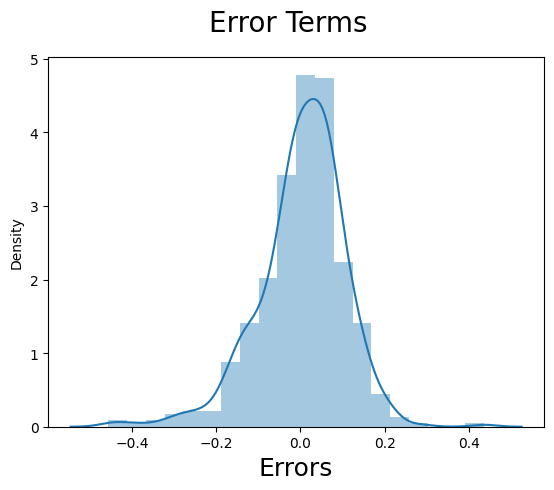

In [1694]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [1695]:
num_vars = ['count','atemp','humidity','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1696]:
df_test.describe()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season_winter,weathersit_LightSnow,weathersit_Mist,year,holiday,workingday,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.232877,0.027397,0.319635,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.423633,0.163612,0.467403,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [1697]:
y_test = df_test.pop('count')
X_test = df_test

In [1699]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1706]:
X_test_new = X_test_new.drop(['const'], axis=1)

In [1707]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

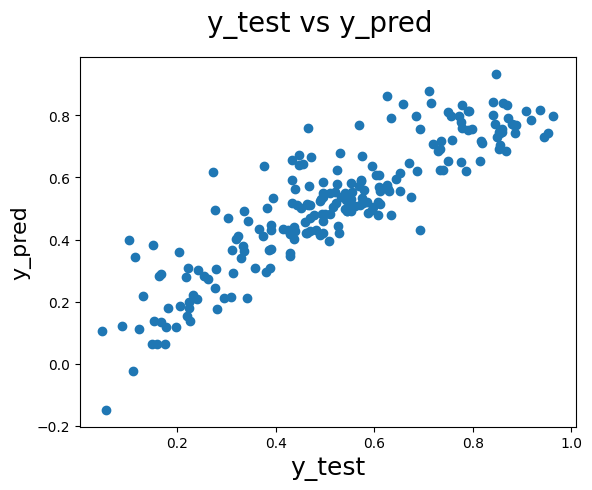

In [1708]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ count = 2.84  \times  atemp + 1.93  \times  year + 1.50  \times  seasonSummer + 1.33  \times  seasonWinter + 1.19  \times  monthSep + 1.15  \times  weekdaySunday + 1.05  \times  weathersitLightSnow + 1.03  \times  holiday +  $


Overall we have a great model, but we also acknowledge that we could do better. 